# INFO

This notebook will be used for construction data processing nodes and exploration purposes within Kedro framework. 

For better experience in previewing and manipulating data in `csv` and `parquet` format when working in VS Code [Data Wrangler](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler) extension is highly recommended.

In [1]:
##############################################################################
# It is recommended to create new virtual environment for each Kedro project #
##############################################################################

# Uncomment and run the line below if your environment does't have
# Kedro or any other dependencies needed.

#! pip install -r requirements.txt

In [2]:
# Load Kedro extention
%load_ext kedro.ipython

[11/03/24 01:05:28] INFO     Using                                                                  ]8;id=927414;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=208482;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/p                
                             roject/rich_logging.yml' as logging configuration.                                    

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=119335;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=258105;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=618291;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=834387;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=243497;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=424630;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py#178\178]8;;\
                             /Users/andriichemerys/Documents/Projects/lending-club.                                
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/03/24 01:05:30] INFO     Kedro project lending_club                                             ]8;id=152312;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=392624;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=425975;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=83896;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py#145\145]8;;\
                             'pipelines'                                                                           

[11/03/24 01:05:31] INFO     Registered line magic 'run_viz'                                        ]8;id=18705;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=991027;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/ipython/__init__.py#151\151]8;;\

# Data processing
---


In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 500)


In [4]:

# Load Lending Club dataset defined as 'original_lc_dataset' in catalog.yml
lending_club = catalog.load("original_lc_dataset")
lending_club.head()

                    INFO     Loading data from original_lc_dataset (CSVDataset)...              ]8;id=79873;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=93605;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=167338079,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=71016917,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 mo

## Dataset Dictionary

In [5]:
# Load dictionary
lc_dict = catalog.load("lc_dataset_dictionary")
lc_dict.LoanStatNew = lc_dict.LoanStatNew.str.strip()
lc_dict = lc_dict.set_index('LoanStatNew', drop=True)
lc_dict.drop(np.nan, inplace=True)
lc_dict

[11/03/24 01:05:33] INFO     Loading data from lc_dataset_dictionary (ExcelDataset)...          ]8;id=617854;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=473446;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


## Converting strings to appropriate formats

In [6]:
lending_club.select_dtypes(object).head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag
0,36 months,13.08%,B,B5,cashier,10+ years,MORTGAGE,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=167338079,home_improvement,Home improvement,115xx,NY,Dec-2004,82.8%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,60 months,9.16%,B,B2,ABM,6 years,RENT,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=71016917,credit_card,Credit card refinancing,708xx,LA,Jan-2004,64.5%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,36 months,10.49%,B,B3,driver,10+ years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=39589826,credit_card,Credit card refinancing,347xx,FL,Apr-2010,52.6%,f,Jan-2018,NaN,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,60 months,11.05%,B,B4,NaN,NaN,MORTGAGE,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=134798709,debt_consolidation,Debt consolidation,443xx,OH,Oct-2005,12.1%,w,May-2020,Jun-2020,May-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,60 months,13.59%,C,C2,Shipping Clerk,10+ years,MORTGAGE,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=127097355,debt_consolidation,Debt consolidation,681xx,NE,Apr-2008,27.1%,w,Jul-2019,NaN,Feb-2020,Individual,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [7]:
# Check some features if they are boolean
bool_list = ['pymnt_plan', 'hardship_flag', 'debt_settlement_flag', 'verification_status', 'verification_status_joint', ]
for x in bool_list:
    print(lending_club[x].value_counts())
    print("")


pymnt_plan
n    100000
Name: count, dtype: int64

hardship_flag
N    94507
Y     4166
Name: count, dtype: int64

debt_settlement_flag
N    98244
Y     1756
Name: count, dtype: int64

verification_status
Source Verified    38932
Not Verified       36467
Verified           24601
Name: count, dtype: int64

verification_status_joint
Not Verified       3350
Source Verified    1934
Verified           1347
Name: count, dtype: int64



In [8]:
# Define functions to parse different kind of values to numbers
def _parse_pct(x: pd.Series) -> pd.Series:
    return x.str.replace("%", "").astype(float)

def _parse_term(x: pd.Series) -> pd.Series:
    return x.str.replace(" months", "").astype(int)

def _parse_date(x: pd.Series) -> pd.Series:
    return pd.to_datetime(x, format="%b-%Y")

def _parse_bool(x: pd.Series) -> pd.Series:
    return x=="Y"

# Make a list of percentage features, formatted as string
pct_list = ['int_rate', 'revol_util']

# Make a list of columns that contains dates in text format
date_list = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
             'sec_app_earliest_cr_line', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date']

# Make a list of boolean features
bool_list = ['pymnt_plan', 'hardship_flag', 'debt_settlement_flag']


### Test functions

In [9]:

# Check functions output
print(f"Parse percentage:\n{_parse_pct(lending_club.int_rate.head())}\n")
print(f"Parse term:\n{_parse_term(lending_club.term.head())}\n")
print(f"Parse date:\n{_parse_date(lending_club.issue_d.head())}\n")
print(f"Parse bool:\n{pd.concat([lending_club.hardship_flag.head(15),_parse_bool(lending_club.hardship_flag.head(15))], axis=1)}\n")

Parse percentage:
0    13.08
1     9.16
2    10.49
3    11.05
4    13.59
Name: int_rate, dtype: float64

Parse term:
0    36
1    60
2    36
3    60
4    60
Name: term, dtype: int64

Parse date:
0   2020-03-01
1   2016-02-01
2   2015-01-01
3   2018-06-01
4   2018-01-01
Name: issue_d, dtype: datetime64[ns]

Parse bool:
    hardship_flag  hardship_flag
0               N          False
1               N          False
2               N          False
3               N          False
4               N          False
5               N          False
6               N          False
7               N          False
8               Y           True
9               N          False
10            NaN          False
11              N          False
12              N          False
13              N          False
14              N          False



Functions defined above where used in `data_processing` pipeline to process raw dataset and save into intermediate dataset with proper data types in `.parquet` format: 
- [nodes.py](https://github.com/Andrii-Chemerys/lending-club/blob/master/src/lending_club/pipelines/data_processing/nodes.py) in `src/lending_club/pipelines/data_processing/nodes.py` 
- [pipeline.py](https://github.com/Andrii-Chemerys/lending-club/blob/master/src/lending_club/pipelines/data_processing/pipeline.py) in `src/lending_club/pipelines/data_processing/pipeline.py`)  

Run this pipeline with command:

In [10]:
!kedro run -p data_processing

[11/03/24 01:05:35] INFO     Using                               ]8;id=237585;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=864442;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/opt/anaconda3/envs/lc/lib/python3                
                             .10/site-packages/kedro/framework/p                
                             roject/rich_logging.yml' as logging                
                             configuration.                                     
[11/03/24 01:05:36] INFO     Kedro project lending-club           ]8;id=949172;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=467217;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py#329\329]8;;\
[11/03/24 01:05:38] INFO     Using synch

# Data cleaning
---
New dataset with apropriate data types, produced by `data_processing` pipeline will be used for further data cleaning process 

In [11]:
lending_club = catalog.load("intermediate_lc_dataset")
lending_club.dtypes

[11/03/24 01:05:43] INFO     Loading data from intermediate_lc_dataset (ParquetDataset)...      ]8;id=180480;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=765365;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\


Unnamed: 0.1                                           int64
Unnamed: 0                                             int64
loan_amnt                                            float64
funded_amnt                                          float64
funded_amnt_inv                                      float64
term                                                   int64
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status            

## Drop columns / fill missing values

In [12]:
# Identify categorical features that has too much unique values to drop them later
# and identify the ones with missing values to address them
unique_val = lending_club.select_dtypes(object).nunique()
missing_val = lending_club.select_dtypes(object).isna().sum()
cat_feat = pd.concat([
    pd.DataFrame({'unique_val':unique_val, 'missing_val':missing_val}),
    lc_dict
    ], axis=1, join='inner'
).sort_values(by='unique_val', ascending=False)
cat_feat

,unique_val,missing_val,Description
url,100000,0,URL for the LC page with listing data.
emp_title,40094,8954,The job title supplied by the Borrower when applying for the loan.*
title,3455,780,The loan title provided by the borrower
zip_code,878,0,The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state,51,0,The state provided by the borrower in the loan application
sub_grade,35,0,LC assigned loan subgrade
hardship_reason,17,95105,Describes the reason the hardship plan was offered
purpose,14,0,A category provided by the borrower for the loan request.
emp_length,11,6950,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
loan_status,10,0,Current status of the loan


In [13]:
# Prepare dictionary-like parameters for 'parameters_data_clean.yml'
data_clean_dict = {
    # Columns that makes no sense or has too many or only one categorical unique values and will be dropped
    'drop_list': ['Unnamed: 0.1', 'Unnamed: 0', 'url', 'emp_title', 'title', 'zip_code', 'pymnt_plan'],
    # Columns that missing values will be replaced by 'none'
    'none_list': ['hardship_reason', 'hardship_loan_status', 'hardship_type', 'hardship_status', 'verification_status_joint'],
    # Columns that missing values will be replaced by most frequent value
    'freq_list': ['emp_length'],
}


In [14]:
# Identify missing values in numerical features to address them later
missing_val = lending_club.select_dtypes([int, float]).isna().sum().sort_values(ascending=False)
missing_val = missing_val.to_frame()
missing_val = pd.concat([missing_val, lc_dict], axis=1, join='inner')
missing_val = missing_val[missing_val[0] != 0]
missing_val

,0,Description
hardship_dpd,95105,Account days past due as of the hardship plan start date
hardship_length,95105,The number of months the borrower will make smaller payments than normally obligated due to a hardship plan
deferral_term,95105,Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan
orig_projected_additional_accrued_interest,93873,The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.
hardship_last_payment_amount,93778,The last payment amount as of the hardship plan start date
hardship_payoff_balance_amount,93778,The payoff balance amount as of the hardship plan start date
hardship_amount,93778,The interest payment that the borrower has committed to make each month while they are on a hardship plan
sec_app_revol_util,93387,Ratio of total current balance to high credit/credit limit for all revolving accounts
revol_bal_joint,93261,"Sum of revolving credit balance of the co-borrowers, net of duplicate balances"
sec_app_open_acc,93260,Number of open trades at time of application for the secondary applicant


In [15]:
# Update dictionary of parameters for 'parameters_data_clean.yml':
#   - columns that null values will be replaced by 0
data_clean_dict['fill_zero'] =['hardship_dpd', 'hardship_length', 'deferral_term', 'orig_projected_additional_accrued_interest',
                  'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'hardship_amount', 'sec_app_open_act_il',
                  'dti_joint', 'annual_inc_joint', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog',
                  'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'mths_since_rcnt_il',
                  'sec_app_revol_util', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
                  'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_inq_last_6mths', 'sec_app_chargeoff_within_12_mths',
                  'sec_app_collections_12_mths_ex_med', 'sec_app_num_rev_accts'
                  ]

#   - columns that null values will be replaced by median values
data_clean_dict['fill_med'] = [ 'il_util', 'all_util', 'inq_fi', 'open_rv_24m', 'open_rv_12m', 'total_bal_il', 'open_il_24m', 'open_il_12m',
                  'total_cu_tl', 'open_act_il', 'open_acc_6m', 'max_bal_bc', 'inq_last_12m', 'mths_since_recent_inq', 'num_tl_120dpd_2m',
                  'mo_sin_old_il_acct', 'bc_util', 'percent_bc_gt_75', 'bc_open_to_buy', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 'avg_cur_bal',
                  'tot_coll_amt', 'tot_cur_bal', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_op_rev_tl', 'num_il_tl',
                  'mo_sin_rcnt_rev_tl_op', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
                  'tot_hi_cred_lim', 'total_il_high_credit_limit', 'mo_sin_rcnt_tl', 'num_bc_tl', 'mo_sin_old_rev_tl_op', 'num_sats', 'num_bc_sats',
                  'total_bc_limit', 'acc_open_past_24mths', 'total_bal_ex_mort', 'mort_acc', 'dti', 'revol_util', 'pub_rec_bankruptcies',
                  'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens', 'total_rev_hi_lim'
                  ]


In [16]:
missing_val = lending_club.select_dtypes('datetime64').isna().sum().sort_values(ascending=False)
missing_val = missing_val.to_frame()
missing_val = pd.concat([missing_val, lc_dict], axis=1, join='inner')
missing_val = missing_val[missing_val[0] != 0]
missing_val

,0,Description
hardship_start_date,95105,The start date of the hardship plan period
hardship_end_date,95105,The end date of the hardship plan period
payment_plan_start_date,95105,"The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments."
sec_app_earliest_cr_line,93260,Earliest credit line at time of application for the secondary applicant
next_pymnt_d,63573,Next scheduled payment date
last_pymnt_d,191,Last month payment was received
last_credit_pull_d,2,The most recent month LC pulled credit for this loan


These missing dates stands for a reason in our dataset, meaning that some event haven't happend. That's why I decided not to fill missing dates, althoug it could be filled by some far back date, say `pd.timestamp(0)` [1970-01-01], to distinghish them from the others. 

In [17]:
# Print parameter list for 'parameters_data_clean.yml'
for key in data_clean_dict.keys():
    print(f"{key}:")
    for x in data_clean_dict[key]:
        print(f"  - {x}")
    print("")


drop_list:
  - Unnamed: 0.1
  - Unnamed: 0
  - url
  - emp_title
  - title
  - zip_code
  - pymnt_plan

none_list:
  - hardship_reason
  - hardship_loan_status
  - hardship_type
  - hardship_status
  - verification_status_joint

freq_list:
  - emp_length

fill_zero:
  - hardship_dpd
  - hardship_length
  - deferral_term
  - orig_projected_additional_accrued_interest
  - hardship_last_payment_amount
  - hardship_payoff_balance_amount
  - hardship_amount
  - sec_app_open_act_il
  - dti_joint
  - annual_inc_joint
  - mths_since_last_record
  - mths_since_recent_bc_dlq
  - mths_since_last_major_derog
  - mths_since_recent_revol_delinq
  - mths_since_last_delinq
  - mths_since_rcnt_il
  - sec_app_revol_util
  - revol_bal_joint
  - sec_app_fico_range_low
  - sec_app_fico_range_high
  - sec_app_mort_acc
  - sec_app_open_acc
  - sec_app_inq_last_6mths
  - sec_app_chargeoff_within_12_mths
  - sec_app_collections_12_mths_ex_med
  - sec_app_num_rev_accts

fill_med:
  - il_util
  - all_util
  - in

In [18]:
# Define functions to clean data
from sklearn.impute import SimpleImputer

def _drop_features(df: pd.DataFrame, params: dict) -> pd.DataFrame:
    return df.drop(params['drop_list'], axis=1)

def _fill_data(df: pd.DataFrame, params: dict) -> pd.DataFrame:

    # Fill missing values by 'None'
    imp_none = SimpleImputer(missing_values=None, strategy='constant', fill_value='none')
    df[params['none_list']] = imp_none.fit_transform(df[params['none_list']])

    # Fill missing values by most frequent ones
    imp_mf = SimpleImputer(missing_values=None, strategy='most_frequent')
    df[params['freq_list']] = imp_mf.fit_transform(df[params['freq_list']])

    # Fill missing values by 0
    imp_zer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    df[params['fill_zero']] = imp_zer.fit_transform(df[params['fill_zero']])

    # Fill missing values by median
    imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
    df[params['fill_med']] = imp_med.fit_transform(df[params['fill_med']])
    return df


### Test functions

In [19]:
lc = _drop_features(lending_club, data_clean_dict).head()
lc

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167338079,4000.0,4000.0,4000.0,36,13.08,134.93,B,B5,10+ years,MORTGAGE,48000.0,Source Verified,2020-03-01,Current,home_improvement,NY,20.25,1.0,2004-12-01,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,2020-05-01,134.93,2020-06-01,2020-05-01,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,None,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,None,None,NaN,NaN,NaT,NaT,NaT,NaN,NaN,None,NaN,NaN,NaN,False
71016917,24000.0,24000.0,24000.0,60,9.16,500.07,B,B2,6 years,RENT,57000.0,Source Verified,2016-02-01,Current,credit_card,LA,25.33,0.0,2004-01-01,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,2020-05-01,500.07,2020-06-01,2020-05-01,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,None,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,None,None,NaN,NaN,NaT,NaT,NaT,NaN,NaN,None,NaN,NaN,NaN,False
39589826,5000.0,5000.0,5000.0,36,10.49,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,2015-01-01,Fully Paid,credit_card,FL,7.22,0.0,2010-04-01,665.0,669.0,0.0,NaN,61.0,7.0,1.0,6001.0

In [20]:
_fill_data(
    lc[lc['hardship_reason'].isna()],
    data_clean_dict
)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167338079,4000.0,4000.0,4000.0,36,13.08,134.93,B,B5,10+ years,MORTGAGE,48000.0,Source Verified,2020-03-01,Current,home_improvement,NY,20.25,1.0,2004-12-01,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,2020-05-01,134.93,2020-06-01,2020-05-01,669.0,665.0,1.0,0.0,1.0,Individual,0.0,0.0,none,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,12529.5,40.2,0.0,0.0,179.0,75.0,38.0,16.0,2.0,6.5,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,16.65,1.0,0.0,395328.0,11948.0,0.0,17928.0,0.0,0.0,0.0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,none,none,none,0.0,0.0,NaT,NaT,NaT,0.0,0.0,none,0.0,0.0,0.0,False
71016917,24000.0,24000.0,24000.0,60,9.16,500.07,B,B2,6 years,RENT,57000.0,Source Verified,2016-02-01,Current,credit_card,LA,25.33,0.0,2004-01-01,680.0,684.0,0.0,0.0,0.0,10.0,0.0,22697.0,64.5,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,2020-05-01,500.07,2020-06-01,2020-05-01,704.0,700.0,0.0,0.0,1.0,Individual,0.0,0.0,none,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,0.0,24.0,0.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.00,0.0,0.0,88154.0,61815.0,13000.0,52954.0,0.0,0.0,0.0,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,none,none,none,0.0,0.0,NaT,NaT,NaT,0.0,0.0,none,0.0,0.0,0.0,False
39589826,5000.0,5000.0,5000.0,36,10.49,162.49,B,B3,10+ years,MORTGAGE,55000.0,Not Verified,2015-01-01,Fully Paid,credit_card,FL,7.22,0.0,2010-04-01,665.0,669.0,0.0,0.0,61.0,7.0,1.

This functions works as expected and was used in pipeline to clean intermediate dataset (i.e. drop columns that will not be used in model and fill missed values) into primary dataset here:
- `src\lending_club\pipelines\data_clean\nodes.py`  
- `src\lending_club\pipelines\data_clean\pipeline.py`

Produce  primary dataset:

In [21]:
!kedro run -p data_clean

[11/03/24 01:05:46] INFO     Using                               ]8;id=223042;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=52682;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/opt/anaconda3/envs/lc/lib/python3                
                             .10/site-packages/kedro/framework/p                
                             roject/rich_logging.yml' as logging                
                             configuration.                                     
[11/03/24 01:05:47] INFO     Kedro project lending-club           ]8;id=409176;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=908955;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py#329\329]8;;\
[11/03/24 01:05:49] INFO     Using synchr

## Outliers

In [22]:
# Load new dataset
lending_club = catalog.load('intermediate_lc_clean')

[11/03/24 01:05:53] INFO     Loading data from intermediate_lc_clean (ParquetDataset)...        ]8;id=651820;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=72061;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

**Z score** method will be used to detect and handle outliers

In [23]:
from scipy import stats

z_scores = np.abs(stats.zscore(lending_club.select_dtypes(np.number)))
outlier_volume = pd.DataFrame()
columns = []
# Threshold in range of 2.5 - 3.5
for threshold in range(250, 351, 25):
    thresh = threshold/100

    # How many outliers identified for each numerical columns?
    gt_thresh = z_scores > thresh
    columns += [f"tr: {thresh}, %"]
    outlier_volume[columns[-1]] = gt_thresh.sum() / z_scores.shape[0] * 100

print(f"Average outliers share:\n{outlier_volume.mean()}")
outlier_volume.sort_values(columns[-1], ascending=False)


Average outliers share:
tr: 2.5, %     2.557789
tr: 2.75, %    2.028624
tr: 3.0, %     1.652422
tr: 3.25, %    1.336339
tr: 3.5, %     1.101688
dtype: float64


,"tr: 2.5, %","tr: 2.75, %","tr: 3.0, %","tr: 3.25, %","tr: 3.5, %"
sec_app_fico_range_high,6.740,6.740,6.697,6.418,5.517
sec_app_fico_range_low,6.740,6.740,6.697,6.418,5.517
deferral_term,4.893,4.893,4.893,4.893,4.893
hardship_length,4.893,4.893,4.893,4.893,4.893
sec_app_revol_util,4.615,4.320,3.988,3.623,3.303
dti_joint,4.938,4.457,3.976,3.524,3.087
sec_app_open_acc,3.863,3.406,3.002,3.002,2.583
hardship_payoff_balance_amount,3.094,2.882,2.677,2.455,2.273
sec_app_num_rev_accts,3.529,3.201,2.834,2.530,2.239
annual_inc_joint,4.312,3.698,3.148,2.673,2.203


**Z-score** treshold at **3.5** suits best for handling outliers since the average share of outliers in this case is `1.1%`. 
However, I prefer to address outliers later on by normalizing or standardizing datasets after splitting it to train/test sets - to avoid data leakage in my model.

## Encoding

In [24]:
# Load 'intermediate clean' dataset
lending_club: pd.DataFrame = catalog.load('intermediate_lc_clean')


[11/03/24 01:05:54] INFO     Loading data from intermediate_lc_clean (ParquetDataset)...        ]8;id=534871;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=89463;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

In [25]:
# Select all 'object' features and split it to three dictionary records
# that will be encoded in different way:
# - loan status:        target  default status (true/false)
# - employment length:  parse to range (0-10) as dataset's dictionary mention
# - rest of features:   one-hot encoding
encode_dict = {
    "default": 'loan_status',
    "emp_len":  'emp_length',
    "category": list(set(lending_club.select_dtypes(object).columns.to_list())
                     - set(['emp_length', 'loan_status']))
}
# Print dictionary to paste in 'parameters_encode.yml'
for key in encode_dict.keys():
    value = encode_dict[key]
    if isinstance(value, str):
        print(f"{key}: {value}")
    else:
        print(f"{key}:")
        for val in value:
            print(f"  - {val}")


default: loan_status
emp_len: emp_length
category:
  - hardship_status
  - hardship_reason
  - application_type
  - hardship_loan_status
  - pymnt_plan
  - verification_status_joint
  - home_ownership
  - addr_state
  - grade
  - verification_status
  - sub_grade
  - hardship_type
  - purpose
  - initial_list_status


In [26]:
# Identify loan status to pick up defaults ones
lending_club.loan_status.value_counts()


loan_status
Fully Paid                                             51189
Current                                                35294
Charged Off                                            12384
Late (31-120 days)                                       535
In Grace Period                                          329
Late (16-30 days)                                         90
Does not meet the credit policy. Status:Fully Paid        69
Issued                                                    63
Does not meet the credit policy. Status:Charged Off       33
Default                                                   14
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import OrdinalEncoder

# Function to encode emp_length to number
def _parse_emp_len(df: pd.DataFrame, params: dict) -> pd.DataFrame:
    return df[params['emp_len']].str.split(" ").str[0].str.replace("+", "").str.replace("<", "0").astype(int)

# Function to encode default_status from loan_status
def _default_status(df: pd.DataFrame, params: dict) -> pd.DataFrame:
    df['default_status'] = (
            (df[params['default']] == 'Charged Off') |
            (df[params['default']] == 'Does not meet the credit policy. Status:Charged Off') |
            (df[params['default']] == 'Default')
    )
    return df

# Function encodes object values to numbers
def _encode(df: pd.DataFrame, params: dict) -> pd.DataFrame:
    encoder = OrdinalEncoder()
    df[params['category']] = encoder.fit_transform(df[params['category']])
    return df

## Test functions

In [28]:
# Test _parse_emp_len function
df = lending_club[['emp_length']].value_counts().reset_index()
df['emp_len_num'] = _parse_emp_len(df, encode_dict)
df.sort_values('emp_len_num')

,emp_length,count,emp_len_num
1,< 1 year,9306,0
4,1 year,6714,1
2,2 years,9014,2
3,3 years,7862,3
6,4 years,6009,4
5,5 years,6158,5
7,6 years,4496,6
8,7 years,4051,7
9,8 years,3919,8
10,9 years,3314,9


In [29]:
# Test _default_status function
df = lending_club[['loan_status']]
df = _default_status(df, encode_dict)

pd.pivot_table(data=df,
               index=['loan_status', 'default_status'],
               aggfunc='count')

                    WARNING  /var/folders/jz/60lb2zs92rn0ndwmwjqnw9fw0000gp/T/ipykernel_53577/27471 ]8;id=535898;file:///opt/anaconda3/envs/lc/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=337527;file:///opt/anaconda3/envs/lc/lib/python3.10/warnings.py#109\109]8;;\
                             672.py:9: SettingWithCopyWarning:                                                     
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df['default_status'] = (                                                            
                                                                                                                   

,
loan_status,default_status
Charged Off,True
Current,False
Default,True
Does not meet the credit policy. Status:Charged Off,True
Does not meet the credit policy. Status:Fully Paid,False
Fully Paid,False
In Grace Period,False
Issued,False
Late (16-30 days),False


In [30]:
# Test encode function
df = lending_club[encode_dict['category']].head(100)
_encode(df, encode_dict).head()

,hardship_status,hardship_reason,application_type,hardship_loan_status,pymnt_plan,verification_status_joint,home_ownership,addr_state,grade,verification_status,sub_grade,hardship_type,purpose,initial_list_status
id,,,,,,,,,,,,,,
167338079,3.0,5.0,0.0,3.0,0.0,3.0,0.0,18.0,1.0,1.0,9.0,2.0,3.0,1.0
71016917,3.0,5.0,0.0,3.0,0.0,3.0,2.0,9.0,1.0,1.0,6.0,2.0,1.0,1.0
39589826,3.0,5.0,0.0,3.0,0.0,3.0,0.0,5.0,1.0,0.0,7.0,2.0,1.0,0.0
134798709,3.0,5.0,0.0,3.0,0.0,3.0,0.0,19.0,1.0,0.0,8.0,2.0,2.0,1.0
127097355,3.0,5.0,0.0,3.0,0.0,3.0,0.0,15.0,2.0,1.0,11.0,2.0,2.0,1.0


Functions works as expected. Therefore they used for encoding categorical values to integers in `intermedian clean` dataset transformation in `encode` pipeline:
- `src/lending_club/pipelines/encode/nodes.py`
- `src/lending_club/pipelines/encode/pipeline.py`

Run this transformation to create new `encoded` dataset that contains only encoded categorical values:

In [31]:
!kedro run -p encode

[11/03/24 01:05:55] INFO     Using                               ]8;id=989315;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=216853;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/opt/anaconda3/envs/lc/lib/python3                
                             .10/site-packages/kedro/framework/p                
                             roject/rich_logging.yml' as logging                
                             configuration.                                     
[11/03/24 01:05:56] INFO     Kedro project lending-club           ]8;id=941100;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=208586;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py#329\329]8;;\
[11/03/24 01:05:58] INFO     Using synch

# Features engineering

In [32]:
# Load cleaned data
lending_club = catalog.load('intermediate_lc_clean')

[11/03/24 01:06:00] INFO     Loading data from intermediate_lc_clean (ParquetDataset)...        ]8;id=244516;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=919887;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

## Date features

In [33]:
# Look at date features to choose what could be used for new features
date_val = lending_club.select_dtypes('datetime64').columns
date_val = date_val.to_frame()
date_val = pd.concat([date_val, lc_dict], axis=1, join='inner').drop(0, axis=1)
date_val

,Description
issue_d,The month which the loan was funded
earliest_cr_line,The month the borrower's earliest reported credit line was opened
last_pymnt_d,Last month payment was received
next_pymnt_d,Next scheduled payment date
last_credit_pull_d,The most recent month LC pulled credit for this loan
sec_app_earliest_cr_line,Earliest credit line at time of application for the secondary applicant
hardship_start_date,The start date of the hardship plan period
hardship_end_date,The end date of the hardship plan period
payment_plan_start_date,"The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments."


In [34]:
# Define dates feature engineering function
def _dates_fe(df: pd.DataFrame, params: dict) -> pd.DataFrame:
    # Feature engineering dataset will be new dataframe
    fe_df = pd.DataFrame()
    # Calculate how many months ago the earliest credit line was open
    fe_df['mo_since_earliest_cr_line'] = (
        (params['cur_date'] - df.earliest_cr_line) / pd.Timedelta(30, 'D')
    ).astype(int)
    fe_df['issue_y'] = df.issue_d.dt.year
    return fe_df


### Testing functions

In [35]:
# Assume the last date of pulling credit history is
# in our current period and it will pass as parameter
params = {'cur_date': lending_club['last_credit_pull_d'].max()}
print(params)

# Test data feature engineering function
pd.concat([lending_club[['earliest_cr_line', 'issue_d']],
        _dates_fe(lending_club.select_dtypes('datetime64'), params)], axis=1).head()

{'cur_date': Timestamp('2020-10-01 00:00:00')}


,earliest_cr_line,issue_d,mo_since_earliest_cr_line,issue_y
id,,,,
167338079,2004-12-01,2020-03-01,192,2020
71016917,2004-01-01,2016-02-01,203,2016
39589826,2010-04-01,2015-01-01,127,2015
134798709,2005-10-01,2018-06-01,182,2018
127097355,2008-04-01,2018-01-01,152,2018


## Other features

In [36]:
# Considering joint applications let's use new 'adjusted' features for annual income, dti and revol_bal
# that takes joint features where it is the case or individual features otherwise
def _adjusted_feat(df: pd.DataFrame, df_fe: pd.DataFrame) -> pd.DataFrame:
    df_fe['dti_adj'] = df.dti_joint.where(df.application_type == "Joint App", df.dti)
    df_fe['revol_bal_adj'] = df.revol_bal_joint.where(df.application_type == "Joint App", df.revol_bal)
    df_fe['annual_inc_adj'] = df.annual_inc_joint.where(df.application_type == "Joint App", df.annual_inc)

    # List of features of second applicant and aggregation function
    # that will be used to produce adjusted feature
    sec_extra_features=[
        ['sec_app_chargeoff_within_12_mths', 'sum'],
        ['sec_app_fico_range_high','max'],
        ['sec_app_inq_last_6mths', 'sum'],
        ['sec_app_mort_acc', 'sum'],
        ['sec_app_num_rev_accts','sum'],
        ['sec_app_open_acc','sum'],
        ['sec_app_open_act_il','sum'],
        ['sec_app_revol_util','avg']
        ]
    # Iterate trough sec_extra_feature list to make new features and remove original
    # features from model's features list
    for sec_feat, func in sec_extra_features:
        feat = sec_feat[8:]                                     # individual's feature name
        feat_adj = feat + "_adj"                                # new feature name
        if func == 'max':
            df_fe[feat_adj] = df[[feat, sec_feat]].max(axis=1)
        elif func == 'sum':
            df_fe[feat_adj] = df[[feat, sec_feat]].sum(axis=1)
        elif func == 'avg':
            df_fe[feat_adj] = df[[feat, sec_feat]].mean(axis=1)
    return df_fe

### Testing function

In [37]:

# Test function output
_adjusted_feat(lending_club, pd.DataFrame()).head()

,dti_adj,revol_bal_adj,annual_inc_adj,chargeoff_within_12_mths_adj,fico_range_high_adj,inq_last_6mths_adj,mort_acc_adj,num_rev_accts_adj,open_acc_adj,open_act_il_adj,revol_util_adj
id,,,,,,,,,,,
167338079,20.25,1988.0,48000.0,0.0,669.0,0.0,2.0,5.0,4.0,1.0,41.40
71016917,25.33,22697.0,57000.0,0.0,684.0,0.0,0.0,9.0,10.0,3.0,32.25
39589826,7.22,6001.0,55000.0,0.0,669.0,0.0,1.0,6.0,7.0,2.0,26.30
134798709,24.55,6573.0,43500.0,0.0,754.0,0.0,2.0,19.0,15.0,1.0,6.05
127097355,24.30,11894.0,48000.0,0.0,739.0,1.0,2.0,16.0,16.0,2.0,13.55


These functions will be used in `features_eng` pipeline and depending on `ignore_new_features` option of parameters might be used in constructing `features_dataset`:
`src\lending_club\pipelines\features\nodes.py`
`src\lending_club\pipelines\features\pipeline.py`

Run this pipeline:

In [57]:
!kedro run -p features

[11/02/24 13:11:45] INFO     Using                               ]8;id=782404;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=817297;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/opt/anaconda3/envs/lc/lib/python3                
                             .10/site-packages/kedro/framework/p                
                             roject/rich_logging.yml' as logging                
                             configuration.                                     
[11/02/24 13:11:45] INFO     Kedro project lending-club           ]8;id=290163;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=993402;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py#329\329]8;;\
[11/02/24 13:11:47] INFO     Using synch

# Exploring data

In [37]:
# Load cleaned and encoded data
lending_club:pd.DataFrame = catalog.load('intermediate_lc_clean')
lending_club_enc:pd.DataFrame = catalog.load('intermediate_encoded')

[11/02/24 13:11:05] INFO     Loading data from intermediate_lc_clean (ParquetDataset)...        ]8;id=554064;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=851446;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

                    INFO     Loading data from intermediate_encoded (ParquetDataset)...         ]8;id=760750;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=805547;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

## Preparing dataset for EDA

In [38]:
# Identify features that might be available at loan application time.
# For correlation analysis I will merge both datasets in the way,
# that encoded features will replace original categorical ones.
descr = pd.concat([lending_club.columns.to_frame(name='lc'),
           lending_club_enc.columns.to_frame(name='lc_enc'),
           lc_dict], axis=1).reset_index()
descr

,index,lc,lc_enc,Description
0,loan_amnt,loan_amnt,NaN,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,funded_amnt,funded_amnt,NaN,The total amount committed to that loan at that point in time.
2,funded_amnt_inv,funded_amnt_inv,NaN,The total amount committed by investors for that loan at that point in time.
3,term,term,NaN,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,int_rate,int_rate,NaN,Interest Rate on the loan
5,installment,installment,NaN,The monthly payment owed by the borrower if the loan originates.
6,grade,grade,grade,LC assigned loan grade
7,sub_grade,sub_grade,sub_grade,LC assigned loan subgrade
8,emp_length,emp_length,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9,home_ownership,home_ownership,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [39]:
# The following indices seems to represent features that might be available at
# loan application time: [0:11], [15:18], [20:29], [46:47], [49:110], [112:119]
# Target (default_status): [136]

analysis_frame = pd.concat([descr.loc[0:11], descr.loc[15:18], descr.loc[20:29], descr.loc[46:47], 
                            descr.loc[49:110], descr.loc[112:119], descr.loc[136:136]], axis=0)
print('No. of features: ', analysis_frame.shape[0])
analysis_frame


No. of features:  99


,index,lc,lc_enc,Description
0,loan_amnt,loan_amnt,NaN,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,funded_amnt,funded_amnt,NaN,The total amount committed to that loan at that point in time.
2,funded_amnt_inv,funded_amnt_inv,NaN,The total amount committed by investors for that loan at that point in time.
3,term,term,NaN,The number of payments on the loan. Values are in months and can be either 36 or 60.
4,int_rate,int_rate,NaN,Interest Rate on the loan
5,installment,installment,NaN,The monthly payment owed by the borrower if the loan originates.
6,grade,grade,grade,LC assigned loan grade
7,sub_grade,sub_grade,sub_grade,LC assigned loan subgrade
8,emp_length,emp_length,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9,home_ownership,home_ownership,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [40]:
# Dictionary for mapping features for analysis to datasets where they located
# Could be used later for construction parameters...yml for pipeline
analisys_features = {
    'encoded': analysis_frame['lc_enc'].dropna().to_list(),
    'clean':analysis_frame[analysis_frame['lc_enc'].isna()].lc.to_list()
}
#TODO: add new features
analisys_features


{
    'encoded': [
        'grade',
        'sub_grade',
        'emp_length',
        'home_ownership',
        'verification_status',
        'purpose',
        'addr_state',
        'application_type',
        'verification_status_joint',
        'default_status'
    ],
    'clean': [
        'loan_amnt',
        'funded_amnt',
        'funded_amnt_inv',
        'term',
        'int_rate',
        'installment',
        'annual_inc',
        'dti',
        'delinq_2yrs',
        'fico_range_low',
        'fico_range_high',
        'inq_last_6mths',
        'mths_since_last_delinq',
        'mths_since_last_record',
        'open_acc',
        'pub_rec',
        'revol_bal',
        'revol_util',
        'total_acc',
        'collections_12_mths_ex_med',
        'mths_since_last_major_derog',
        'annual_inc_joint',
        'dti_joint',
        'acc_now_delinq',
        'tot_coll_amt',
        'tot_cur_bal',
        'open_acc_6m',
        'open_act_il',
        'open_il_12m',
  

In [41]:
# Function for merging features for analisys from clean and encoded datasets
def eda_df (df_clean: pd.DataFrame, df_encode: pd.DataFrame, params: dict) -> pd.DataFrame:
    return pd.concat([df_clean[params['clean']], df_encode[params['encoded']]], axis=1)

# Print analysis_features in parameters...yml format to use in pipeline
for key in analisys_features.keys():
    print(key, ":")
    for feat in analisys_features[key]:
        print(f"  - {feat}")

encoded :
  - grade
  - sub_grade
  - emp_length
  - home_ownership
  - verification_status
  - purpose
  - addr_state
  - application_type
  - verification_status_joint
  - default_status
clean :
  - loan_amnt
  - funded_amnt
  - funded_amnt_inv
  - term
  - int_rate
  - installment
  - annual_inc
  - dti
  - delinq_2yrs
  - fico_range_low
  - fico_range_high
  - inq_last_6mths
  - mths_since_last_delinq
  - mths_since_last_record
  - open_acc
  - pub_rec
  - revol_bal
  - revol_util
  - total_acc
  - collections_12_mths_ex_med
  - mths_since_last_major_derog
  - annual_inc_joint
  - dti_joint
  - acc_now_delinq
  - tot_coll_amt
  - tot_cur_bal
  - open_acc_6m
  - open_act_il
  - open_il_12m
  - open_il_24m
  - mths_since_rcnt_il
  - total_bal_il
  - il_util
  - open_rv_12m
  - open_rv_24m
  - max_bal_bc
  - all_util
  - total_rev_hi_lim
  - inq_fi
  - total_cu_tl
  - inq_last_12m
  - acc_open_past_24mths
  - avg_cur_bal
  - bc_open_to_buy
  - bc_util
  - chargeoff_within_12_mths
  - 

### Testing function

In [42]:
eda_df(lending_club, lending_club_enc, analisys_features).head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,application_type,verification_status_joint,default_status
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167338079,4000.0,4000.0,4000.0,36,13.08,134.93,48000.0,20.25,1.0,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8,12.0,1.0,0.0,0.0,0.0,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,6262.5,57.3,0.0,0.0,179.0,75.0,38.0,16.0,2.0,14.0,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,33.3,1.0,0.0,395328.0,11948.0,0.0,17928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,10,1.0,1.0,4.0,34.0,0.0,3.0,False
71016917,24000.0,24000.0,24000.0,60,9.16,500.07,57000.0,25.33,0.0,680.0,684.0,0.0,0.0,0.0,10.0,0.0,22697.0,64.5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,0.0,24.0,0.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6,5.0,1.0,1.0,18.0,0.0,3.0,False
39589826,5000.0,5000.0,5000.0,36,10.49,162.49,55000.0,7.22,0.0,665.0,669.0,0.0,0.0,61.0,7.0,1.0,6001.0,52.6,9.0,0.0,0.0,0.0,0.0,0.0,0.0,159131.0,1.0,2.0,0.0,1.0,0.0,24095.5,72.0,1.0,2.0,4569.0,57.0,11400.0,1.0,0.0,1.0,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,0.0,1.0,0.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,10,1.0,0.0,1.0,9.0,0.0,3.0,False
134798709,24000.0,24000.0,24000.0,60,11.05,522.42,43500.0,24.55,0.0,750.0,754.0,0.0,0.0,0.0,15.0,0.0,6573.0,12.1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,104590.0,2.0,1.0,0.0,1.0,17.0,11947.0,60.0,2.0,3.0,2223.0,25.0,54500.0,2.0,0.0,2.0,4.0,6973.0,43140.0,12.0,0.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,0.0,3.0,0.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,10,1.0,0.0,2.0,35.0,0.0,3.0,False
127097355,14000.0,14000.0,14000.0,60,13.59,322.79,48000.0,24.30,0.0,735.0,739.0,1.0,0.0,0.0,16.0,0.0,11894.0,27.1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,90253.0,2.0,2.0,1.0,1.0,7.0,22953.0,60.0,3.0,4.0,3907.0,43.0,43900.0,1.0,0.0,2.0,5.0,5641.0,17318.0,39.9,0.0,0.0,72.0,117.0,6.0,6.0,2.0,6.0,0.0,5.0,0.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,

The `eda_df` function is now used for merging intermediate `clean` and `encoded` datasets into a primary `analysis` dataset in `analysis` pipeleine:
- `src/lending_club/pipelines/analysis/nodes.py`
- `src/lending_club/pipelines/analysis/pipeline.py`

As a result of this pipeline primary dataset for further analysis contains 100 features, including our `target` 

In [43]:
# Run 'analysis' pipeline:
!kedro run -p analysis

[11/02/24 13:11:06] INFO     Using                               ]8;id=394412;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=598205;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/opt/anaconda3/envs/lc/lib/python3                
                             .10/site-packages/kedro/framework/p                
                             roject/rich_logging.yml' as logging                
                             configuration.                                     
[11/02/24 13:11:07] INFO     Kedro project lending-club           ]8;id=458788;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=451549;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/framework/session/session.py#329\329]8;;\
[11/02/24 13:11:09] INFO     Using synch

## Descriptive analysis

In [44]:
# Load dataset for EDA
eda_table: pd.DataFrame = catalog.load('primary_analysis')
eda_table.head()

[11/02/24 13:11:11] INFO     Loading data from primary_analysis (ParquetDataset)...             ]8;id=887756;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=254954;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,addr_state,application_type,verification_status_joint,default_status
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
167338079,4000.0,4000.0,4000.0,36,13.08,134.93,48000.0,20.25,1.0,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8,12.0,1.0,0.0,0.0,0.0,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,6262.5,57.3,0.0,0.0,179.0,75.0,38.0,16.0,2.0,14.0,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,33.3,1.0,0.0,395328.0,11948.0,0.0,17928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,10,1.0,1.0,4.0,34.0,0.0,3.0,False
71016917,24000.0,24000.0,24000.0,60,9.16,500.07,57000.0,25.33,0.0,680.0,684.0,0.0,0.0,0.0,10.0,0.0,22697.0,64.5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,0.0,24.0,0.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6,5.0,1.0,1.0,18.0,0.0,3.0,False
39589826,5000.0,5000.0,5000.0,36,10.49,162.49,55000.0,7.22,0.0,665.0,669.0,0.0,0.0,61.0,7.0,1.0,6001.0,52.6,9.0,0.0,0.0,0.0,0.0,0.0,0.0,159131.0,1.0,2.0,0.0,1.0,0.0,24095.5,72.0,1.0,2.0,4569.0,57.0,11400.0,1.0,0.0,1.0,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,0.0,1.0,0.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,10,1.0,0.0,1.0,9.0,0.0,3.0,False
134798709,24000.0,24000.0,24000.0,60,11.05,522.42,43500.0,24.55,0.0,750.0,754.0,0.0,0.0,0.0,15.0,0.0,6573.0,12.1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,104590.0,2.0,1.0,0.0,1.0,17.0,11947.0,60.0,2.0,3.0,2223.0,25.0,54500.0,2.0,0.0,2.0,4.0,6973.0,43140.0,12.0,0.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,0.0,3.0,0.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,10,1.0,0.0,2.0,35.0,0.0,3.0,False
127097355,14000.0,14000.0,14000.0,60,13.59,322.79,48000.0,24.30,0.0,735.0,739.0,1.0,0.0,0.0,16.0,0.0,11894.0,27.1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,90253.0,2.0,2.0,1.0,1.0,7.0,22953.0,60.0,3.0,4.0,3907.0,43.0,43900.0,1.0,0.0,2.0,5.0,5641.0,17318.0,39.9,0.0,0.0,72.0,117.0,6.0,6.0,2.0,6.0,0.0,5.0,0.0,0.0,4.0,5.0,5.0,6.0,5.0,13.0,16.0,5.0,16.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,152081.0,34847.0,28800.0,

In [45]:
from scipy.stats import skew
statistics = eda_table.describe().transpose().reset_index()
statistics['skew'] = skew(eda_table[statistics['index']])
statistics.set_index('index', drop=True, inplace=True)

z_scores = np.abs(stats.zscore(eda_table.astype(float)))
gt_thresh = z_scores > 3.5
statistics['outliers_num (zs:3.5)'] = gt_thresh.sum()

statistics

,count,mean,std,min,25%,50%,75%,max,skew,outliers_num (zs:3.5)
index,,,,,,,,,,
loan_amnt,100000.0,15332.373000,9468.189883,700.00,8000.0000,13000.00,20000.00,40000.00,0.788725,0
funded_amnt,100000.0,15328.216250,9467.415275,700.00,8000.0000,13000.00,20000.00,40000.00,0.789471,0
funded_amnt_inv,100000.0,15313.244829,9470.918891,0.00,8000.0000,13000.00,20000.00,40000.00,0.789088,0
term,100000.0,43.107840,10.957553,36.00,36.0000,36.00,60.00,60.00,0.892934,0
int_rate,100000.0,13.056737,4.876960,5.31,9.1700,12.49,16.01,30.99,0.775004,285
installment,100000.0,451.708510,273.022605,22.51,253.0600,380.81,602.30,1719.83,1.006219,91
annual_inc,100000.0,80029.177073,87224.342962,0.00,47160.5000,66000.00,95000.00,10999200.00,47.014850,394
dti,100000.0,19.330996,17.269276,-1.00,12.0675,18.10,24.87,999.00,30.850754,290
delinq_2yrs,100000.0,0.284730,0.823520,0.00,0.0000,0.00,0.00,18.00,5.561436,1142


In [46]:
eda_table.default_status.describe()


count     100000
unique         2
top        False
freq       87569
Name: default_status, dtype: object

>**Key statistics**
>`Annual income` and `dti` values are highly left skewed, where distance between median and max are very high. `Loan amoumts`, `interest rates`, `installments` and `fico ranges` are slightly skewed to left. All of these features, has 280-390 outliers at z-core **3.5**, except loan amount (none).

>`Default status` has 87.5% of `false` values, that means our target is inbalanced. For better prediction outcome of our model dataset shpild be balanced fisrt.

## Selecting features

[11/02/24 13:11:19] WARNING  Matplotlib is building the font cache; this may take a moment.    ]8;id=71400;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278013;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/matplotlib/font_manager.py#1040\1040]8;;\

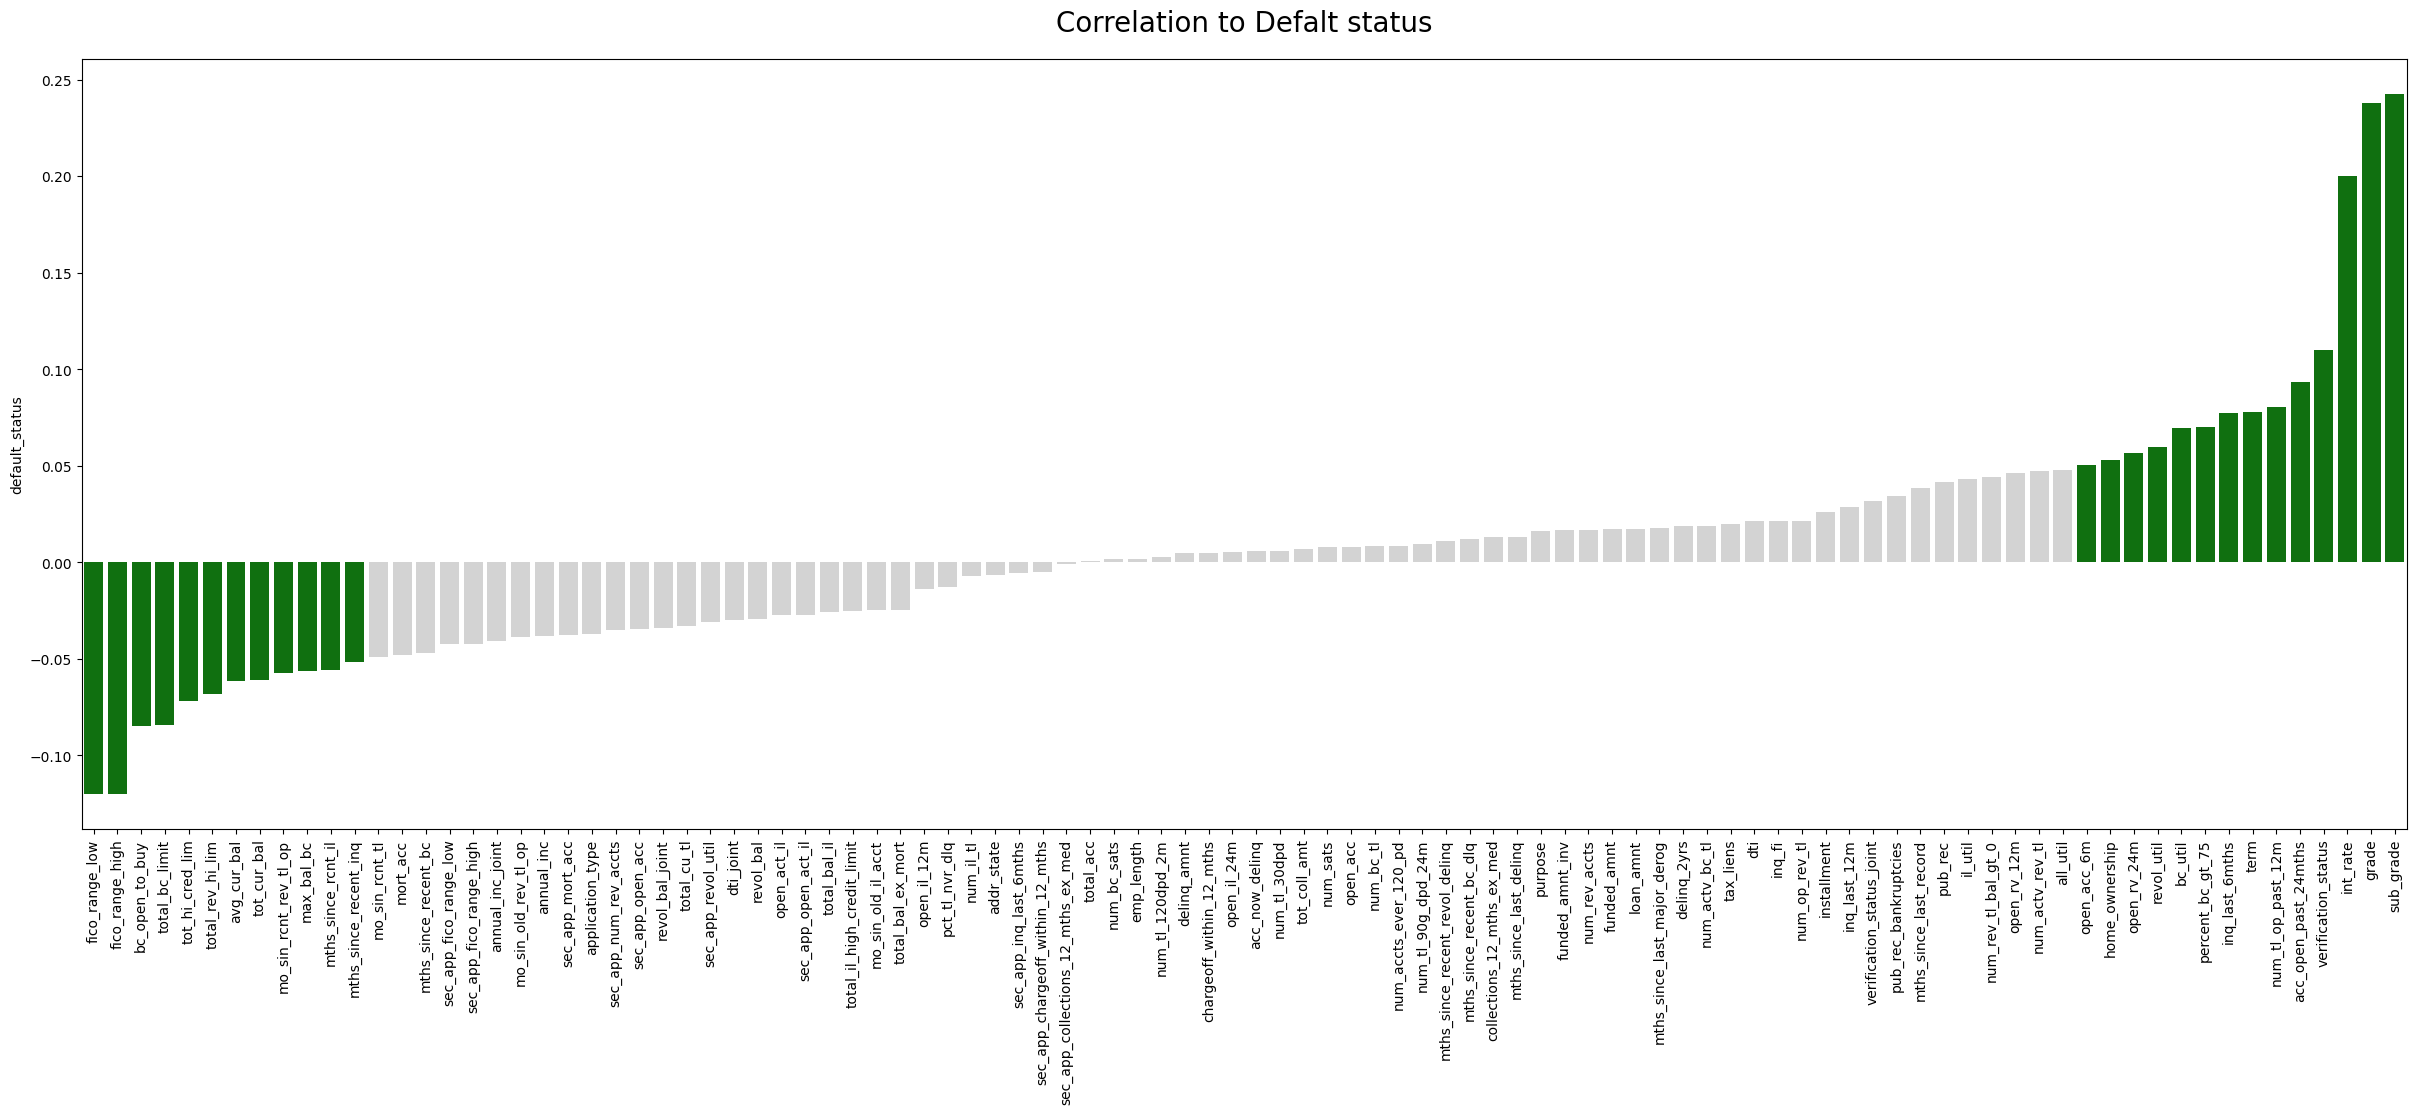

No of High correlated to target features:  26


In [47]:
import matplotlib.pyplot  as plt 
import seaborn as sns

def sel_high_corr_feat(df: pd.DataFrame, corr_treshold):
    eda_corr=df.corr()
    def_stat_corr = eda_corr.default_status.sort_values().drop('default_status')
    target_high_corr = def_stat_corr[np.abs(def_stat_corr) > corr_treshold]
    fig, ax = plt.subplots(figsize=(30, 10))
    ax = sns.barplot(def_stat_corr, color='lightgrey')
    ax = sns.barplot(target_high_corr, color="green")
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    plt.title('Correlation to Defalt status', fontsize=20, pad=20)
    plt.show()    
    return target_high_corr


target_high_corr_feat = sel_high_corr_feat(eda_table, 0.05)
print("No of High correlated to target features: ", target_high_corr_feat.shape[0])


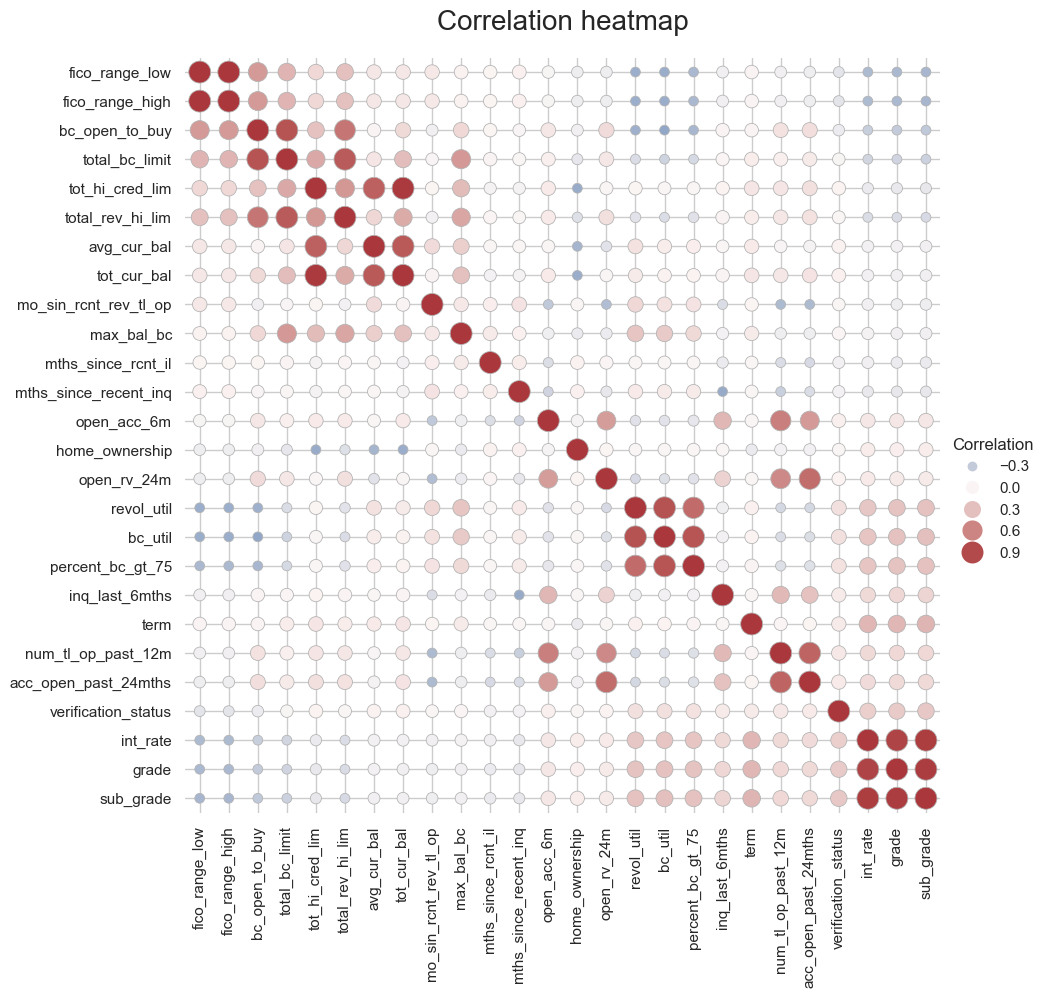

In [48]:
sns.set_theme(style="whitegrid")

# Compute a correlation matrix and convert to long-form
corr_mtx = eda_table[target_high_corr_feat.index.to_list()].corr().stack().reset_index(name='Correlation')
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mtx,
    x="level_0", y="level_1", hue="Correlation", size="Correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
plt.title('Correlation heatmap', fontsize=20, pad=20)
plt.show()

In [49]:
df_high_corr = corr_mtx[(corr_mtx.Correlation != 1) & (corr_mtx.Correlation > 0.75)].sort_values(by='Correlation', ascending=False).drop_duplicates('Correlation')

print("No of highly correlated features:", df_high_corr.shape[0])
df_high_corr

No of highly correlated features: 12


,level_0,level_1,Correlation
1,fico_range_low,fico_range_high,1.000000
111,tot_hi_cred_lim,tot_cur_bal,0.982831
649,grade,sub_grade,0.973179
673,sub_grade,int_rate,0.962326
622,int_rate,grade,0.937408
406,revol_util,bc_util,0.861582
55,bc_open_to_buy,total_bc_limit,0.854934
458,percent_bc_gt_75,bc_util,0.847135
188,tot_cur_bal,avg_cur_bal,0.824250
133,total_rev_hi_lim,total_bc_limit,0.812928


>This dataset has 26 features that has correlation to `target` more than 5%, 12 of them has correlation between each other by more than 75% and might be dropped from model input.

In [50]:
# Select important variables for prediction model
important_feat = list(set(target_high_corr_feat.index.to_list()) - set(df_high_corr['level_0']))

# Print for parameters....yml
print("features:")
[print("  - ", feat) for feat in important_feat]

features:
  -  open_rv_24m
  -  bc_util
  -  mths_since_rcnt_il
  -  max_bal_bc
  -  acc_open_past_24mths
  -  term
  -  inq_last_6mths
  -  home_ownership
  -  fico_range_high
  -  mo_sin_rcnt_rev_tl_op
  -  total_bc_limit
  -  verification_status
  -  mths_since_recent_inq
  -  open_acc_6m


[None, None, None, None, None, None, None, None, None, None, None, None, None, None]

These features will be used in `selected_feature` pipeline to select features for baseline model:
`src\lending_club\pipelines\features\nodes.py`
`src\lending_club\pipelines\features\pipeline.py`

# Splitting to train/test sets

Split dataset for `training` and `testing` sets to isolate them before applying standartization/normalization techniques. Due to the fact that our dataset is inbalanced the `training` datasets will be balanced with `SMOTE`.

Pipeline `split_dataset` used for splitting `features` dataset to `X_train, X_test, y_train, y_test` datasets:
- `src\lending_club\pipelines\split_dataset\nodes.py`
- `src\lending_club\pipelines\split_dataset\pipeline.py`

In [73]:
# Load features dataset
lending_club = catalog.load('features_dataset')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def split_n_balance(df: pd.DataFrame, params: dict):
    y = df.default_status
    X = df.drop('default_status', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=params['test_size'], 
        random_state=params['random_state']
    )
    print("Train imbalanced datasets size (X, y): %d, %d", X_train.shape[0], y_train.shape[0])
    smote = SMOTE()
    X_train, y_train = smote.fit_resample(X_train, y_train) # type: ignore
    print("Train balanced datasets size (X, y): %d, %d", X_train.shape[0], y_train.shape[0])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_n_balance(lending_club, {'test_size': 0.2,'random_state': 42})

print("\nX_train\n", X_train.head(1))
print("\nX_test\n", X_test.head(1))
print("\ny_train\n", y_train.head(1))
print("\ny_test\n", y_test.head(1))

# Run this code in a pipeline:
!kedro run -p split_dataset

[11/02/24 15:50:32] INFO     Loading data from features_dataset (ParquetDataset)...             ]8;id=558740;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=982494;file:///opt/anaconda3/envs/lc/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

Train imbalanced datasets size (X, y): %d, %d 80000 80000
Train balanced datasets size (X, y): %d, %d 140026 140026

X_train
    total_bc_limit  mo_sin_rcnt_rev_tl_op  max_bal_bc  mths_since_recent_inq  \
0         78800.0                    4.0      7207.0                    1.0   

   inq_last_6mths  fico_range_high  term  home_ownership  verification_status  \
0             2.0            674.0    60             4.0                  1.0   

   acc_open_past_24mths  mths_since_rcnt_il  open_rv_24m  open_acc_6m  bc_util  
0                   9.0                11.0          5.0          3.0     44.7  

X_test
            total_bc_limit  mo_sin_rcnt_rev_tl_op  max_bal_bc  \
id                                                             
126315810         49350.0                   20.0     15708.0   

           mths_since_recent_inq  inq_last_6mths  fico_range_high  term  \
id                                                                        
126315810                    9.0      

# Additional processing

In [59]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
def standartizer(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

